In [1]:
!pip install --quiet gradio
!pip install --quiet pyyaml h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.1 MB/s

In [2]:
# Import Proper packages
import numpy as np
import pandas as pd
import os
from google.colab import drive

import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import seaborn as sns

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

from joblib import dump, load

In [3]:
# Mount the drive to work in google drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/23-24 Senior Year/CSML/FinalProject')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/23-24 Senior Year/CSML/FinalProject


In [4]:
# Read in pre_processed csv from previous colab
data = pd.read_csv('/content/drive/MyDrive/23-24 Senior Year/CSML/FinalProject/preprocessedWarfarinCSML.csv')
data

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,1,20,5,193.040,115.70,2,0,0,2.5,2.60,0,1,49.00
1,0,20,4,176.530,144.20,2,0,0,2.5,2.15,0,0,42.00
2,0,20,3,162.560,77.10,2,0,0,2.5,1.90,0,2,53.00
3,1,20,5,182.245,90.70,2,0,0,2.5,2.40,0,1,28.00
4,1,20,4,167.640,72.60,2,0,0,2.5,1.90,5,1,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,1,20,1,185.420,113.64,0,0,0,2.5,2.80,0,3,52.50
5524,0,20,6,160.020,55.91,0,0,0,2.5,2.80,5,3,27.51
5525,1,20,5,187.960,97.73,0,0,0,2.5,2.00,0,3,57.47
5526,1,20,5,177.800,87.27,0,0,0,2.5,2.00,11,3,70.00


In [5]:
# There are no NAN values but just in case drop them
data = data.dropna()

In [6]:
# Print out some info on the data to check counts and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5528 non-null   int64  
 1   Race (Reported)                                                    5528 non-null   int64  
 2   Age                                                                5528 non-null   int64  
 3   Height (cm)                                                        5528 non-null   float64
 4   Weight (kg)                                                        5528 non-null   float64
 5   Diabetes                                                           5528 non-null   int64  
 6   Simvastatin (Zocor)                                                5528 non-null   int64  
 7   Amiodarone (Cordarone)  

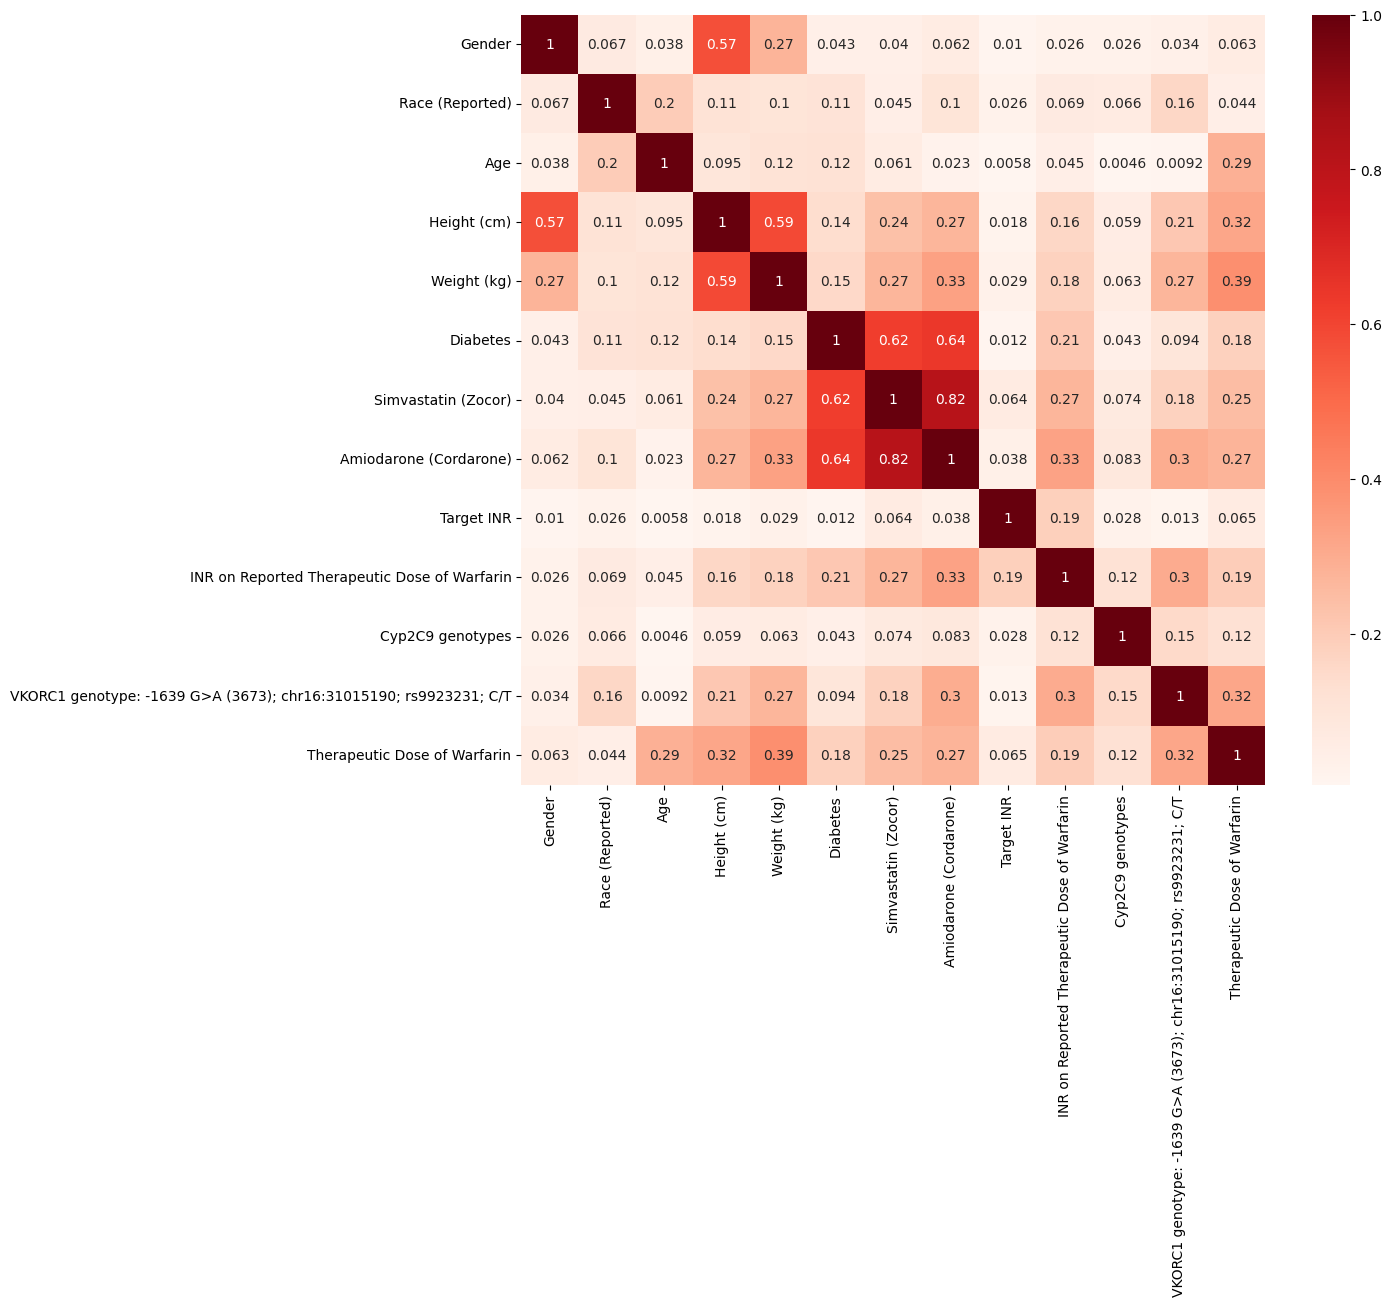

In [7]:
# Plot Correlation coefficent using a heatmap
plt.figure(figsize=(12,10))
cor=data.corr()
cor = abs(cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# plt.savefig('AbsCorr_HeadMap.png')

In [8]:
data.columns

Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'INR on Reported Therapeutic Dose of Warfarin',
       'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
       'Therapeutic Dose of Warfarin'],
      dtype='object')

<Axes: >

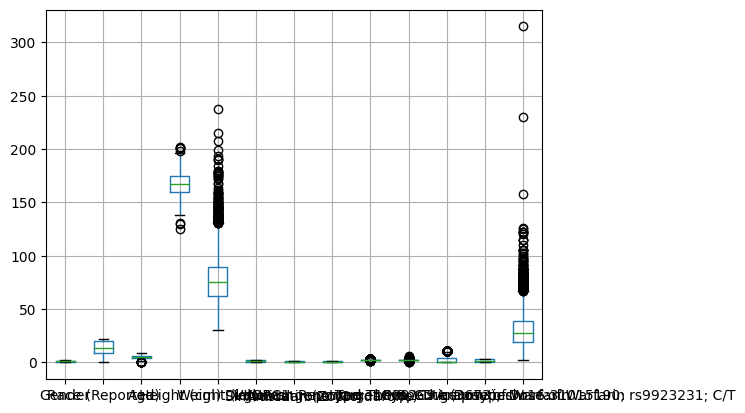

In [9]:
data.boxplot(data.columns.tolist()) # Check data range distribution

In [10]:
data.iloc[:, 0:12]

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
0,1,20,5,193.040,115.70,2,0,0,2.5,2.60,0,1
1,0,20,4,176.530,144.20,2,0,0,2.5,2.15,0,0
2,0,20,3,162.560,77.10,2,0,0,2.5,1.90,0,2
3,1,20,5,182.245,90.70,2,0,0,2.5,2.40,0,1
4,1,20,4,167.640,72.60,2,0,0,2.5,1.90,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5523,1,20,1,185.420,113.64,0,0,0,2.5,2.80,0,3
5524,0,20,6,160.020,55.91,0,0,0,2.5,2.80,5,3
5525,1,20,5,187.960,97.73,0,0,0,2.5,2.00,0,3
5526,1,20,5,177.800,87.27,0,0,0,2.5,2.00,11,3


In [11]:
# read in the features
X = data.iloc[:, 0:12]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X

array([[0.5       , 0.90909091, 0.55555556, ..., 0.33962264, 0.        ,
        0.33333333],
       [0.        , 0.90909091, 0.44444444, ..., 0.25471698, 0.        ,
        0.        ],
       [0.        , 0.90909091, 0.33333333, ..., 0.20754717, 0.        ,
        0.66666667],
       ...,
       [0.5       , 0.90909091, 0.55555556, ..., 0.22641509, 0.        ,
        1.        ],
       [0.5       , 0.90909091, 0.55555556, ..., 0.22641509, 1.        ,
        1.        ],
       [0.5       , 0.90909091, 0.66666667, ..., 0.41509434, 1.        ,
        1.        ]])

In [12]:
# Read in the labels
y = data.iloc[:, 12]
y

0       49.00
1       42.00
2       53.00
3       28.00
4       42.00
        ...  
5523    52.50
5524    27.51
5525    57.47
5526    70.00
5527    24.01
Name: Therapeutic Dose of Warfarin, Length: 5528, dtype: float64

In [13]:
# pca = PCA(n_components=5)
# b = pca.fit(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# b.shape

In [16]:
y_train[y_train<=30] = 0
y_train[y_train>30] = 1
y_test[y_test<=30] = 0
y_test[y_test>30] = 1

<Axes: >

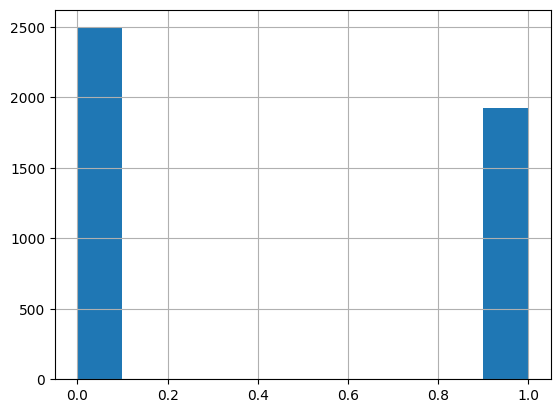

In [17]:
# Slightly Imbalenced
y_train.hist()

In [18]:
# Define Parameters for grid pipline when using gridsearchCV
pca = PCA()
rfc = RandomForestClassifier()
rfc_pipe = Pipeline(steps=[('pca', pca), ('model', rfc)])
parameters = {'pca__n_components' : [3,4,5],
              'model__n_estimators' : [300, 500],
              'model__criterion' : ['entropy','log_loss'],
              'model__max_depth' : [10,15,25],
              'model__max_features' : ['sqrt','log2'],
              'model__min_samples_split' : [2,5],
              'model__min_samples_leaf' : [2,5],
              'model__oob_score' : [True],
              'model__bootstrap' : [True]}

In [19]:
# Define the model/grid - If hyperparameter tuning is desired switch out these two lines
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy',max_depth=10, max_features='log2',min_samples_split=5, min_samples_leaf=5,oob_score=True,bootstrap=True, n_jobs=10)
# grid = GridSearchCV(estimator = rfc_pipe, param_grid=parameters, cv = 3, verbose=2, n_jobs = 10)

In [20]:
#---------------------------------------------------------
# This Section takes about 30 minutes to run
# best Params:
#             pca: 5
#             model: n_estimators=500, criterion='entropy',max_depth=10, max_features='log2',min_samples_split=5, min_samples_leaf=5, oob_score=True, bootstrap=True, n_jobs=10

# grid.fit(X_train, y_train)
# cv_results = pd.DataFrame(grid.cv_results_)
# cv_results.to_csv('rfc_grid.csv', index=False)
# best_model = grid.best_estimator_
# dump(best_model, "rfc_best.joblib")
# -------------------------------------------------------
# otherwise we can just load best model below
# best_model = load('rfc_best.joblib')

In [21]:
# Fit the model
rfc.fit(X_train,y_train)
# grid.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=500, n_jobs=10, oob_score=True)

In [22]:
# Store predictions from training
y_pred_train = rfc.predict(X_train)

# Store predictions from testing
y_pred_test = rfc.predict(X_test)

In [23]:
# Calculate model metrics for train
rf_acc_train = accuracy_score(y_train, y_pred_train)
rf_prec_train = precision_score(y_train, y_pred_train)
rf_recall_train = recall_score(y_train, y_pred_train)
rf_roc_train = roc_auc_score(y_train, y_pred_train)
rf_f1_train = f1_score(y_train, y_pred_train)

# Display model metrics for train
print("Train Accuracy Score : ",rf_acc_train)
print("Train Precision Score : ",rf_prec_train)
print("Train Recall Score : ",rf_recall_train)
print("Train Forest ROC Score : ",rf_roc_train)
print("Train Forest F1 Score : ",rf_f1_train)

Train Accuracy Score :  0.8251922207146087
Train Precision Score :  0.8035808320168509
Train Recall Score :  0.7923156801661475
Train Forest ROC Score :  0.8214382888010224
Train Forest F1 Score :  0.7979084967320261


In [24]:
# Calculate model metrics for test
rf_acc_test = accuracy_score(y_test, y_pred_test)
rf_prec_test = precision_score(y_test, y_pred_test)
rf_recall_test = recall_score(y_test, y_pred_test)
rf_roc_test = roc_auc_score(y_test, y_pred_test)
rf_f1_test = f1_score(y_test, y_pred_test)

# Display model metrics for test
print("Test Accuracy Score : ",rf_acc_test)
print("Test Precision Score : ",rf_prec_test)
print("Test Recall Score : ",rf_recall_test)
print("Test ROC Score : ",rf_roc_test)
print("Test F1 Score : ",rf_f1_test)

Test Accuracy Score :  0.7486437613019892
Test Precision Score :  0.7092050209205021
Test Recall Score :  0.7092050209205021
Test ROC Score :  0.7439337206513339
Test F1 Score :  0.7092050209205021


In [25]:
# Re-define X and Y for the NN regression problem
# Scale X features
X = data.iloc[:, 0:12]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Our labels now stay in regression form
y = data.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Function to calculate Regression metrices RMSE, RRMSE and R2
def reg_model_metrics(actual, pred):
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(MSE)
    actual_mean = np.mean(actual)
    RRMSE = 100 * RMSE / actual_mean
    R2 = r2_score(actual, pred)
    return RMSE, RRMSE, R2

In [27]:
# Build model function
def DNN_F1_model(batch_size, learn_rate, epochs):

    # Input Layer
    INPUT = Input(shape=(X_train.shape[1],))

    # Hidden layers
    X = Dense(64, activation='relu')(INPUT)
    X = Dense(128, activation='relu')(X)
    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.3)(X)
    X = Dense(512, activation='relu')(X)
    X = Dense(512, activation='relu')(X)
    X = Dense(1024, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.3)(X)

    # Output layer - linear activation function for regression
    OUTPUT = Dense(1, activation='linear')(X)

    # Define the model
    model = Model(INPUT, OUTPUT)

    # Model Compile
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learn_rate))

    # Define Checkpoint
    # Set an unique id to the model
    model_file_name = "WarfDNN.hdf5"
    checkpoint = ModelCheckpoint(filepath=model_file_name, monitor='val_loss', save_best_only=True, mode='min')
    callbacks = [checkpoint]

    # Model fitting/training
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=callbacks)

    # Get metrics
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Make predictions on test set
    y_pred_test = model.predict(X_test)
    RMSE_test, RRMSE_test, R2_test = reg_model_metrics(y_test, y_pred_test)

    # Return metrics
    return train_loss, val_loss, RMSE_test, RRMSE_test, R2_test, y_test, y_pred_test, model_file_name

In [28]:
# Optimal hyperparamters
batch_size = 16
learn_rate = 0.0001
epochs = 15

In [29]:
train_loss, val_loss, RMSE_test, RRMSE_test, R2_test, y_test, y_pred_test, model_file_name = DNN_F1_model(
                batch_size,
                learn_rate,
                epochs)

Epoch 1/15
222/222 [==============================] - 16s 35ms/step - loss: 1195.0547 - val_loss: 1005.1937
Epoch 2/15
  5/222 [..............................] - ETA: 3s - loss: 1474.7087

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 3s 16ms/step - loss: 1105.1613 - val_loss: 894.9860
Epoch 3/15
222/222 [==============================] - 5s 21ms/step - loss: 1025.3259 - val_loss: 850.2801
Epoch 4/15
222/222 [==============================] - 4s 18ms/step - loss: 910.7642 - val_loss: 682.0189
Epoch 5/15
222/222 [==============================] - 3s 15ms/step - loss: 776.0975 - val_loss: 560.1061
Epoch 6/15
222/222 [==============================] - 4s 16ms/step - loss: 632.8693 - val_loss: 431.7788
Epoch 7/15
222/222 [==============================] - 4s 20ms/step - loss: 491.6549 - val_loss: 344.8409
Epoch 8/15
222/222 [==============================] - 5s 21ms/step - loss: 373.9269 - val_loss: 224.2221
Epoch 9/15
222/222 [==============================] - 4s 16ms/step - loss: 293.0827 - val_loss: 179.7578
Epoch 10/15
222/222 [==============================] - 4s 16ms/step - loss: 245.2384 - val_loss: 157.0354
Epoch 11/15
222/222 [==============================] - 4s 19ms/

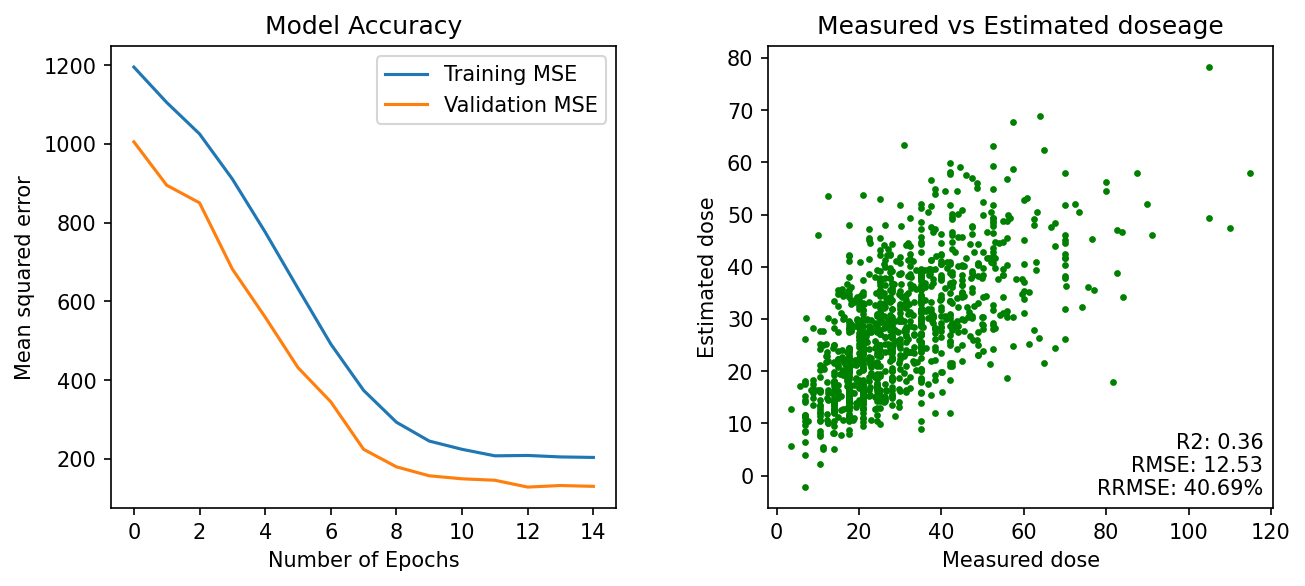

Best Model Name:  WarfDNN.hdf5
Best Batch Size: 16
Best Learning Rate: 0.00010
Best # Epochs: 15
Model Testing R^2: 0.36
Mode Testing RMSE: 12.53
Model Testing RRMSE: 40.69%


In [36]:
# Visulize the Accuracy acorss different epochs and scatterplot
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

ax[0].plot(train_loss)
ax[0].plot(val_loss)
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Mean squared error')
ax[0].set_xlabel('Number of Epochs')
ax[0].legend(['Training MSE', 'Validation MSE'], loc = 'upper right')

ax[1].scatter(y_test, y_pred_test, s=5, color='g')
ax[1].set_title('Measured vs Estimated doseage')
ax[1].set_ylabel('Estimated dose')
ax[1].set_xlabel('Measured dose')
ax[1].text(0.98, 0.02, 'R2: {0:.2f}\nRMSE: {1:.2f}\nRRMSE: {2:.2f}%'.format(R2_test, RMSE_test, RRMSE_test),
           ha='right', va='bottom', transform=ax[1].transAxes)

plt.subplots_adjust(wspace=0.3)
plt.show()

print('Best Model Name: ', model_file_name)
print('Best Batch Size: %.0f' % batch_size)
print('Best Learning Rate: %.5f' % learn_rate)
print('Best # Epochs: %.0f' % epochs)
print('Model Testing R^2: %.2f' % R2_test)
print('Mode Testing RMSE: %.2f' % RMSE_test)
print('Model Testing RRMSE: %.2f' % RRMSE_test+'%')

In [31]:
import gradio as gr

In [32]:
# race_classes = ['African-American' 0.0, 'Asian' : 1.0, 'Black' : 2.0, 'Black African' : 3.0, 'Black Caribbean' : 4.0, 'Black or African American' : 5.0, 'Black other' : 6.0, 'Caucasian' : 7.0, 'Chinese' : 8.0, 'Han Chinese' : 9.0, 'Hispanic' : 10.0, 'Indian' : 11.0, 'Intermediate' : 12.0, 'Japanese' : 13.0, 'Korean' : 14.0, 'Malay' : 15.0, 'Other' : 16.0, 'Other (Black British)' : 17.0, 'Other (Hungarian)' : 18.0, 'Other Mixed Race' : 19.0, 'White' : 20.0, 'other' : 21.0]

In [33]:
# gender_classes = ['female','male']
# race_classes = ['African-American', 'Asian', 'Black', 'Black African', 'Black Caribbean', 'Black or African American', 'Black other', 'Caucasian', 'Chinese', 'Han Chinese', 'Hispanic', 'Indian', 'Intermediate', 'Japanese', 'Korean', 'Malay', 'Other', 'Other (Black British)', 'Other (Hungarian)', 'Other Mixed Race', 'White', 'other']
# age_classes = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90+']
# cyp2c9_classes = ['*1/*1', '*1/*11', '*1/*13', '*1/*14', '*1/*2', '*1/*3', '*1/*5', '*1/*6', '*2/*2', '*2/*3', '*3/*3']
# vkorc1_classes = ['A/A', 'A/G', 'G/G']
# diabetes_classes = ['No', 'Yes']

In [34]:
from keras.models import load_model
NNmodel = load_model('WarfDNN.hdf5')

In [35]:
# Define callback function
def warfarin_callback(age, height, weight, gender, race, diabetes, med_sim, med_ami, Cyp2C9, VKORC1, INR, model):

  age1 = age
  gender1 = gender
  weight1 = weight
  height1 = height
  race1 = race
  sim1 = med_sim
  ami1 = med_ami
  cpy1 = Cyp2C9
  vko1 = VKORC1
  inr1 = INR

  # Gender, Race (Reported), Age, Height (cm), Weight (kg), Diabetes, Simvastatin (Zocor), Amiodarone (Cordarone), Target INR, INR on Reported Therapeutic Dose of Warfarin, Cyp2C9 genotypes, VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
  input_df = pd.DataFrame([[gender1, race1, age1, height1, weight1, float(diabetes), sim1, ami1, 2.5, inr1, cpy1, vko1]], columns=["Gender", "Race (Reported)", "Age", "Height (cm)", "Weight (kg)", "Diabetes", "Simvastatin (Zocor)", "Amiodarone (Cordarone)", "Target INR", "INR on Reported Therapeutic Dose of Warfarin", "Cyp2C9 genotypes", "VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"])
  preprocessed_input_df = input_df
  # Model Selection
  if model == "Random Forest":
    prediction = (rfc.predict(preprocessed_input_df))
    print("rfc prediction = " + str(prediction))
    if prediction:
      return "The recommended Warfarin Dose is >30mg"
    else:
      return "The recommended Warfarin Dose is <=30mg"
  if model == "Neural Network":
    x = np.asarray(preprocessed_input_df).astype('float32')
    prediction = (NNmodel.predict(x))
    print("Prediction = " + str(prediction) + "mg")
  else:
    return "Please select a Machine Learning Model"

# Define output module as Warfarin dose
output_dose = gr.Textbox(label = "Warfarin Dose")
# Define all input modules
input_age = gr.Dropdown(choices=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], label = "Age")
input_height = gr.Number(label = "Height (cm)")
input_weight = gr.Number(label = "Weight (kg)")
input_gender = gr.Radio(choices=[0.0, 1.0], label = "Gender")
input_race = gr.Dropdown(choices=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0], label = "Race")
input_diabetes = gr.Dropdown(choices=[0.0,1.0], label = "Diabetic")
input_sim = gr.Dropdown([0.0, 1.0], label = "Simvastatin (Zocor)")
input_ami = gr.Dropdown([0.0, 1.0], label = "Amiodarone (Cordarone)")
input_Cyp269 = gr.Dropdown([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], label = "Cyp2C9 genotype")
input_VKORC1 = gr.Dropdown([0.0, 1.0, 2.0], label = "VKORC1 genotype")
input_INR = gr.Slider(1, 5, step=0.01, label = "INR on Reported Therapeutic Dose of Warfarin")
input_model = gr.Dropdown(choices=["Random Forest", "Neural Network" ], label = "Machine Learning Model")
# input_age = gr.Slider(10, 100, step=1, label = "Age")
# input_height = gr.Number(label = "Height (cm)")
# input_weight = gr.Number(label = "Weight (kg)")
# input_gender = gr.Radio(choices=["Male", "Female"], label = "Gender")
# input_race = gr.Dropdown(choices=['Asian', 'Black or African American', 'Caucasian', 'Chinese', 'Han Chinese', 'Hispanic', 'Indian', 'Intermediate', 'Japanese', 'Korean', 'Malay', 'Other','Other Mixed Race', 'Unspecified', 'White'], label = "Race")
# input_diabetes = gr.Checkbox(label = "Is the patient Diabetic?")
# input_medication = gr.CheckboxGroup(["Simvastatin (Zocor)", "Amiodarone (Cordarone)"], label = "Is the patient taking any of the following medication?")
# input_Cyp269 = gr.Dropdown(['*1/*1', '*1/*11', '*1/*13', '*1/*14', '*1/*2', '*1/*3', '*1/*5', '*1/*6', '*2/*2', '*2/*3', '*3/*3'], label = "Cyp2C9 genotype")
# input_VKORC1 = gr.Dropdown(['A/A', 'A/G', 'G/G', 'Unknown'], label = "VKORC1 genotype")
# input_INR = gr.Slider(1, 5, step=0.01, label = "INR on Reported Therapeutic Dose of Warfarin")
# input_model = gr.Dropdown(choices=["Random Forest", "Neural Network" ], label = "Machine Learning Model")
gr.Interface(fn=warfarin_callback, inputs=[input_age, input_height, input_weight,input_gender, input_race, input_diabetes, input_sim, input_ami, input_Cyp269, input_VKORC1, input_INR, input_model], outputs=output_dose).launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bd71dda90816a519d3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bd71dda90816a519d3.gradio.live
